## Problem definition
Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy source, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classification model to predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.
## Dataset description
In this work, we will be using the dataset from the link https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+  
## Predictive Feature
>>'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
>>'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
>>'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');
## Dependent Variables
>>'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
>>'stabf': a categorical (binary) label ('stable' or 'unstable').

Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and'stabf' will remain as the sole dependent variable (binary classification).

## Modelling
The dataset was splitted into an 80-20 train-test split with a random state of “1”. Normalization technique of the standard scaler to transform the train set (x_train, y_train) and the test set (x_test). We trained a random forest and extra trees classifier. And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Also we set the random_state = 1 for training all models and evaluate on the test set.
## Evaluation
`Accuracy`
## Hyperparameter tuning of the XTraTreeClassifier
To improve the model, we carried out a hyperparameter tuning of the `ExtraTreeClassifier` using the `RandomizedSearchCV` technique.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
df = pd.read_csv("data/Data_for_UCI_named.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df_temp = df.copy()

In [5]:
df_temp.drop('stab', axis=1,inplace=True)

In [6]:
df_temp.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [7]:
df_temp['stabf'] = df_temp['stabf'].map(lambda x:0 if isinstance(x,str)==True and x.lower()=='stable' else 1)

In [8]:
df_temp.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


In [9]:
df_temp.stabf.value_counts()

1    6380
0    3620
Name: stabf, dtype: int64

stable is 0 and unstable is 1

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [11]:
df_temp.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


In [12]:
#split data into features and label
X = df_temp.drop("stabf", axis=1)
y = df_temp["stabf"]

In [13]:
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [14]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: stabf, dtype: int64

In [15]:
#split dataset into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [16]:
scaler = StandardScaler()
normalized_Xtrain_df = scaler.fit_transform(X_train)
normalized_test_df = scaler.fit_transform(X_test)

In [17]:
normalized_train_df = pd.DataFrame(normalized_Xtrain_df, columns=X_train.columns)
normalized_train_df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.551314,0.007408,-1.177640,1.016898,-0.397177,0.759820,-0.636951,0.572703,-1.209413,0.313976,-1.625728,-0.637401
7996,1.015925,-0.223483,-1.489381,-1.479078,0.451468,-0.731994,0.990355,-1.048148,-1.094647,-0.755209,0.734821,-0.304433
7997,0.657609,-0.722756,-1.405888,-0.274301,-0.012584,1.438694,-0.364266,-1.046683,1.253539,0.293100,-1.550587,0.810344
7998,-0.059316,-1.260532,-1.010471,-0.877808,-0.779769,0.828824,0.516923,0.018984,-0.182448,-0.388255,-0.726781,1.667916


In [18]:
normalized_test_df = pd.DataFrame(normalized_test_df,columns=X_test.columns)
normalized_test_df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.592163,-0.420565,1.472472,1.093036,0.426786,-1.504594,-0.792677,1.600201,-0.925703,1.175287,-1.492644,1.086291
1,0.199183,0.364543,-0.190076,-0.518473,-0.229402,-1.071766,0.427103,1.052337,-1.655910,-0.395949,1.412703,1.227535
2,-1.086035,-0.321834,-0.873505,0.011761,-0.977094,0.094896,0.813041,0.751381,1.450284,-1.444370,0.654216,-1.679799
3,-0.087014,-1.113357,0.361518,-1.684316,0.792280,-1.649041,0.410662,-0.084473,0.066085,-1.679450,-0.349573,1.057439
4,0.873004,1.425833,0.080476,1.681022,-0.154247,-0.024315,-0.197525,0.485988,0.119716,-1.475773,0.957057,-0.817608
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.119526,-0.682371,-1.362900,1.261070,0.266377,-0.817583,0.745388,-0.370774,0.471600,-0.114316,-1.251379,-1.280864
1996,-1.084900,-0.815496,1.010385,0.326900,-0.167494,0.322284,1.002069,-1.049289,0.941736,0.899379,-1.050349,-1.091915
1997,0.947138,-1.668313,-1.629077,0.518632,-1.576793,1.566742,0.094662,0.997188,-1.261183,0.128899,0.576286,1.320848
1998,-1.127354,0.184573,-0.238207,0.409415,-1.205991,0.718553,0.029632,1.293823,1.518021,0.800172,-1.348463,-0.799858


In [19]:
RFC = RandomForestClassifier(random_state=1)
RFC.fit(normalized_train_df,y_train)

RandomForestClassifier(random_state=1)

In [20]:
RFC.score(normalized_test_df,y_test)

0.928

In [21]:
XTC = ExtraTreesClassifier(random_state=1)
XTC.fit(normalized_train_df,y_train)

ExtraTreesClassifier(random_state=1)

In [22]:
XTC.score(normalized_test_df,y_test)

0.926

In [23]:
from xgboost import XGBClassifier

In [24]:
clf = XGBClassifier(random_state=1)

In [25]:
clf.fit(normalized_train_df,y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:47:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
clf.score(normalized_test_df,y_test)

0.946

In [27]:
import lightgbm as ltb

In [28]:
model = ltb.LGBMClassifier(random_state=1)

In [29]:
model.fit(normalized_train_df,y_train)

LGBMClassifier(random_state=1)

In [30]:
model.score(normalized_test_df,y_test)

0.9365

In [31]:
preds = model.predict(normalized_test_df)

In [32]:
preds

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
XTC_reg = {'n_estimators':[50,100,300,500,1000],
          'min_samples_split':[2.3,5,7,9],
          'min_samples_leaf':[1,2,4,6,8],
          'max_features':['auto','sqrt','log2',None]}
XTC_reg_grid = RandomizedSearchCV(XTC,
                                 param_distributions=XTC_reg,
                                 n_iter=10,
                                 n_jobs=-1,
                                 cv=5,
                                 verbose=True,
                                 random_state=1)
XTC_reg_grid.fit(normalized_train_df,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2.3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, verbose=True)

In [35]:
XTC_reg_grid.score(normalized_test_df,y_test)

0.9335

In [36]:
# Computing the importance of each feature
feature_importance = XTC.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        XTC.estimators_],
                                        axis = 0)

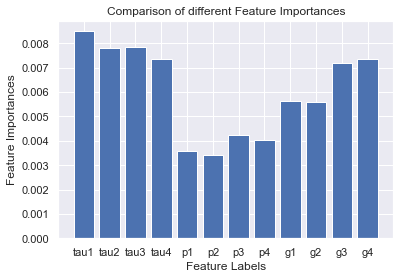

In [37]:
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()